In [52]:
import pandas as pd
import numpy as np

# Models
import sklearn
from sklearn.linear_model import LinearRegression

# Preprocessing
from sklearn.feature_selection import r_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Data Preparation
from sklearn.preprocessing import MinMaxScaler

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import mean_squared_error

# Plotting
import matplotlib.pyplot as plt

In [53]:
# DATA LOADING
X = pd.read_csv('cStick.csv')
X.columns = ['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer','Decision']

# create X and y variables
y = X['Decision']
X = X.drop('Decision', axis=1)

# DROP PRESSURE
X = X.drop('Pressure', axis=1)

# print number of instances in each class
print(y.value_counts())

# Scale Data using MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Creating training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



0    690
1    682
2    667
Name: Decision, dtype: int64


In [54]:

# LINEAR REGRESSION MODEL
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)


Test Accuracy: 1.0
F1 Score: 1.0


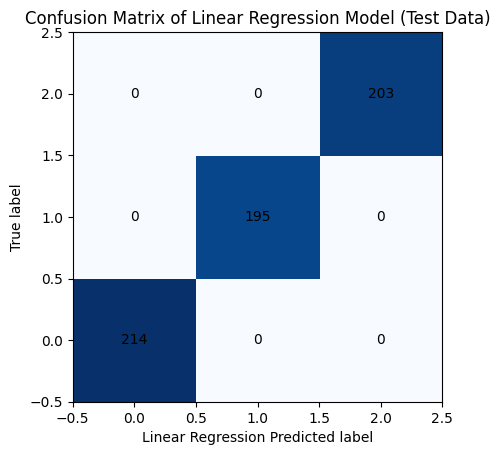

In [55]:
# EVALUATION
# Linear model

# EVALUATION
# round the predictions to the nearest integer
y_pred_linear = np.round(y_pred_linear)
print('Test Accuracy:', accuracy_score(y_test, y_pred_linear))
print('F1 Score:', f1_score(y_test, y_pred_linear, average='weighted'))

# Visaualizing Confusion Matrix
cm = confusion_matrix(y_test, y_pred_linear, labels=[0, 1, 2])
plt.imshow(cm,interpolation='none',cmap='Blues', origin='lower')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Linear Regression Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix of Linear Regression Model (Test Data)")
plt.show()